### Analyse du taux de désabonnement des clients de télécommunication
Objectif : 
- Identifier les facteurs influençant le taux de désabonnement des clients.
- Construire un modèle prédictif pour anticiper les désabonnements.         


#### Importation et description des données 

In [22]:
## Importation des bibliothèques 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [23]:
## Importation et Description des données 

data =pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Importation effectué avec succès")

Importation effectué avec succès


In [24]:
## Description des données 
print("Voici l'Aperçu des données :")
print("="*150)
display(data.head())
print("="*150)
print("voici les informations sur les données :")
print("="*150)
display(data.info())
print("="*150)
print("Voici les statistiques descriptives des données numériques :")
print("="*150)
display(data.describe())
print("="*150)
print("Voici la dimension des données :")
print("="*150)
display(data.shape)

Voici l'Aperçu des données :


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


voici les informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  P

None

Voici les statistiques descriptives des données numériques :


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Voici la dimension des données :


(7043, 21)

En se basant sur la description des données on remarque que le type de "TotalCharges"  devrait etre en float mais est en object . cela necessitera leur conversion dans leur types approprié . 

#### Visualisation et  Traitement des Données 

In [25]:
## converion des types de données

'''
Suite a notre remarque nous allons proceder a la conversion des types de données " TotalCharges "
'''
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"],errors="coerce")
print("Conversion des types effectuée avec succès")

Conversion des types effectuée avec succès


In [26]:
print("type de TotalCharges :",data["TotalCharges"].dtype)
print("="*150)
display(data.describe())
display(data.info())

type de TotalCharges : float64


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

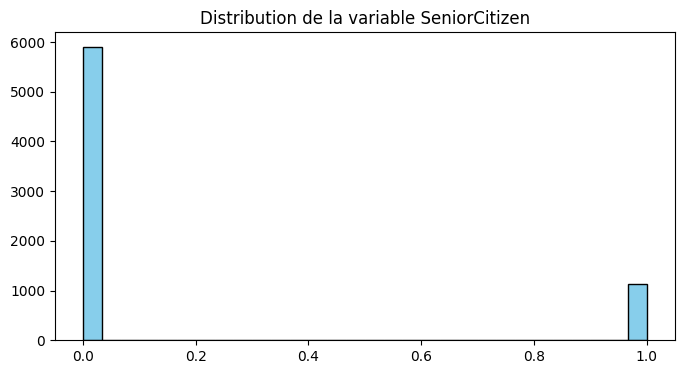

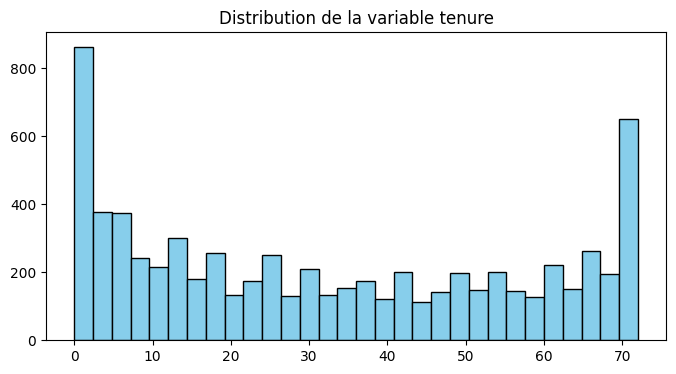

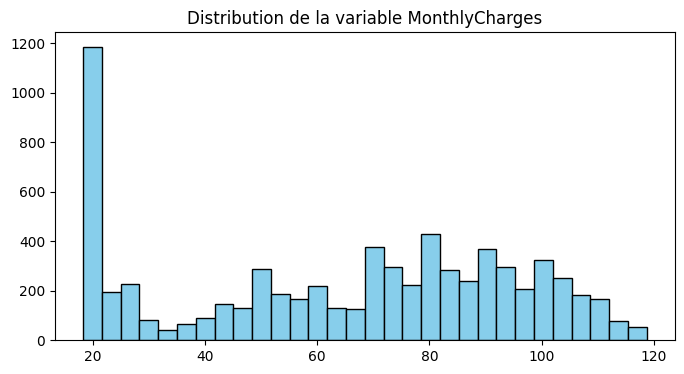

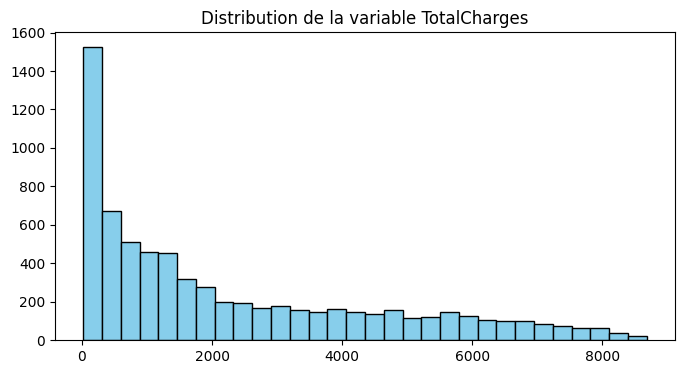

In [27]:
for i in data.select_dtypes(include=["float64","int64"]).columns:
    plt.figure(figsize=(8,4))
    plt.hist(data[i],bins=30,color="skyblue",edgecolor="black")
    plt.title(f"Distribution de la variable {i}")
    plt.show()

#### Analyse bivarié  de quelque variables cibles 

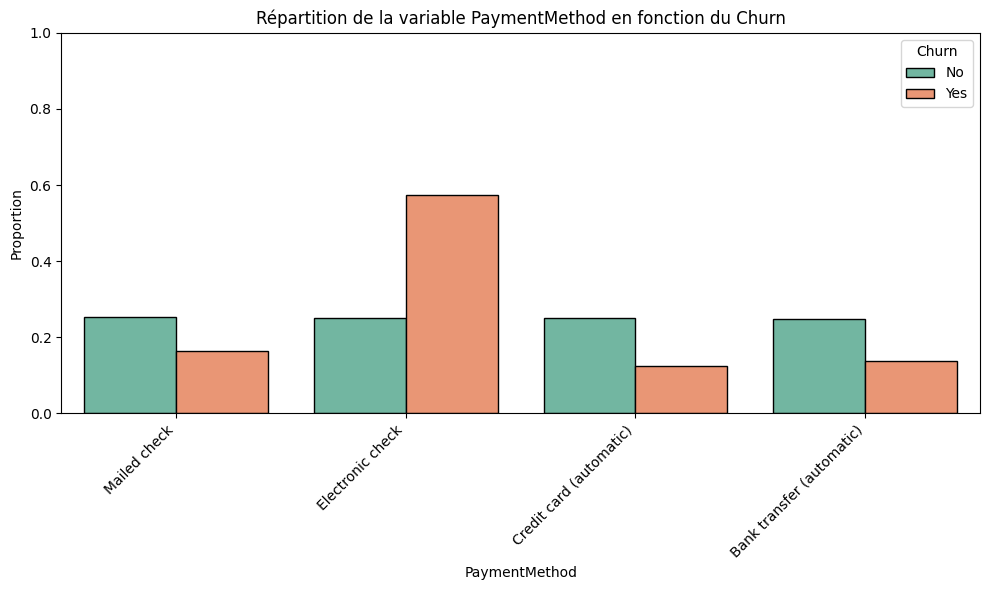

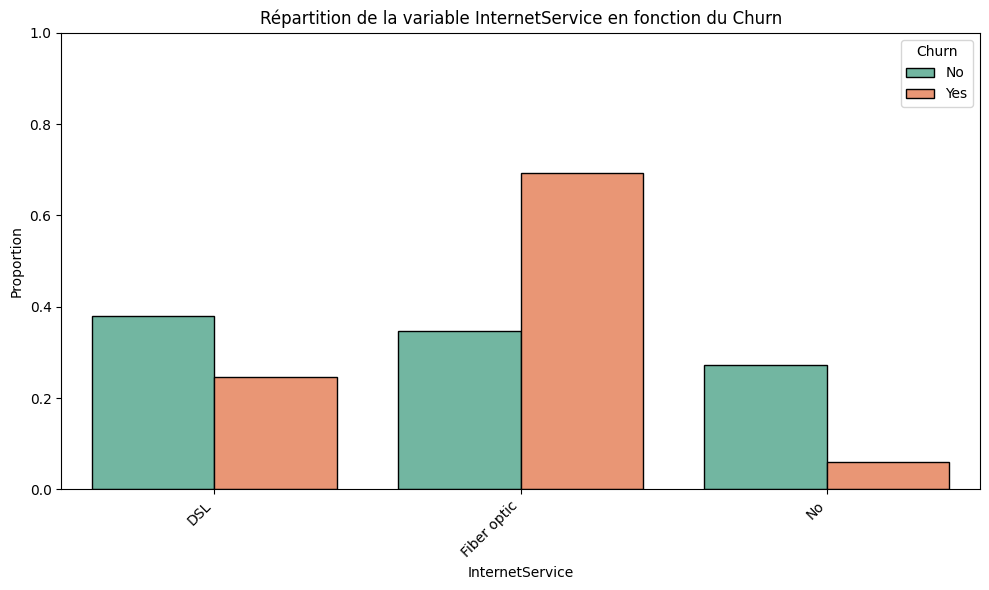

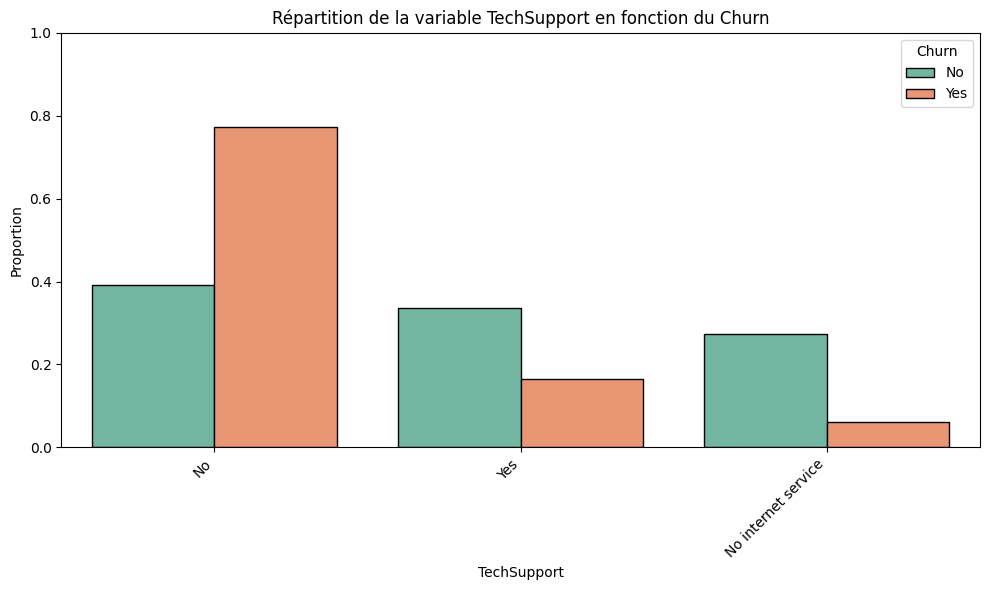

In [28]:
data_cat=["PaymentMethod","InternetService","TechSupport"]
for i in data_cat:
    group = data.groupby(by="Churn")[i].value_counts(normalize=True).rename("count") 
    donnee = group.reset_index()  
    
    plt.figure(figsize=(10,6))
    sns.barplot(data=donnee, x=i, y="count", hue="Churn", palette="Set2", edgecolor="black")
    plt.title(f"Répartition de la variable {i} en fonction du Churn")
    plt.ylabel("Proportion")  
    plt.ylim(0, 1)            
    plt.xticks(rotation=45, ha='right') 
    plt.legend(title="Churn") 
    plt.tight_layout()        
    plt.show()

In [29]:
a=data.groupby(by="Churn")["InternetService"].value_counts(normalize=True)
b=data.groupby(by="Churn")["PaymentMethod"].value_counts(normalize=True)
c=data.groupby(by="Churn")["TechSupport"].value_counts(normalize=True)
display(a)
display(b)  
display(c)

Churn  InternetService
No     DSL                0.379204
       Fiber optic        0.347700
       No                 0.273096
Yes    Fiber optic        0.693954
       DSL                0.245586
       No                 0.060460
Name: proportion, dtype: float64

Churn  PaymentMethod            
No     Mailed check                 0.252029
       Electronic check             0.250097
       Credit card (automatic)      0.249324
       Bank transfer (automatic)    0.248550
Yes    Electronic check             0.573034
       Mailed check                 0.164794
       Bank transfer (automatic)    0.138042
       Credit card (automatic)      0.124131
Name: proportion, dtype: float64

Churn  TechSupport        
No     No                     0.391767
       Yes                    0.335137
       No internet service    0.273096
Yes    No                     0.773676
       Yes                    0.165864
       No internet service    0.060460
Name: proportion, dtype: float64

- On constate que les clients qui payent leur abonnement par voie electronique sont les plus enclins a se desabonner(57% des desabonnement concernait les clients qui payent par voie electronique ) . Aussi ceux qui ont la fibre optique et ceux qui n'ont pas de support de technique sont ceux qui ont le plus grand pourcentage de desabonnement . 

In [30]:
## Visualisation des valeurs manquantes 
tableau={}
for i in data.columns:
    f=data[i].isnull().sum()
    if f>0:
        propo=(f/len(data))*100
        tableau[i] = propo
## dataframe des valeurs manquantes
pro1=pd.DataFrame.from_dict(tableau,orient="index",columns=["Proportion des valeurs manquantes"])

display(pro1)

,Proportion des valeurs manquantes
TotalCharges,0.156183


On sait que ,d'apres la description du jeu de donnée que le "totalcharge "est le montant total facturé tout au long de la tenure du client (nombre de mois pendant lequel le client est restez avec l'entreprise ),du coup l'absence de montant toal(presence de valeur manquantes) peut etre liée au fait que le client n'est pas restez au moins un mois avec l'entreprise avec qui il a souscrit . verifions cela .

In [31]:
data[data["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Bingo. on constate que les clients avec des valeurs manquantes pour "TotalCharges" ont une tenure de 0 mois,
ce qui confirme notre hypothèse initiale. Donc dans cet cas nous allons remplacer toutes les valeurs manquantes par 0 et non les supprimer . 

In [32]:
## remplacement des valeurs manquantes
data["TotalCharges"]=data["TotalCharges"].fillna(0)
print("remplacement des valeurs manquantes effectué avec succès")
display(data["TotalCharges"].isnull().sum())

remplacement des valeurs manquantes effectué avec succès


np.int64(0)

Maintenant passons a la visualisation des valeurs aberrantes pour nos variables quantitatives . 

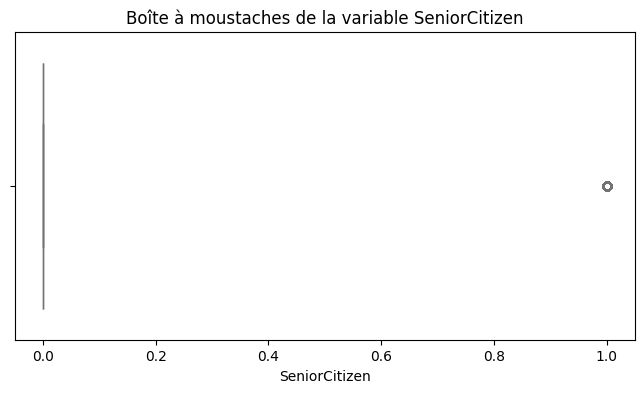

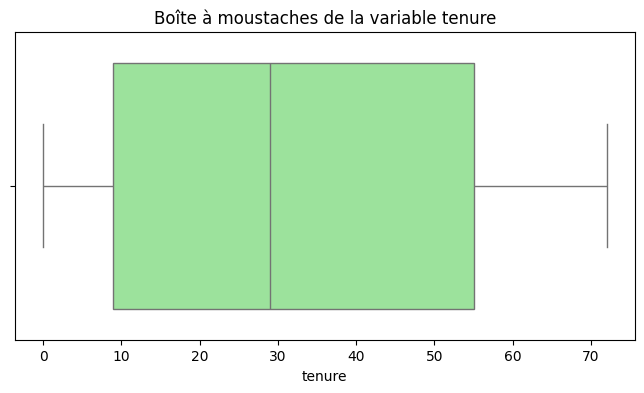

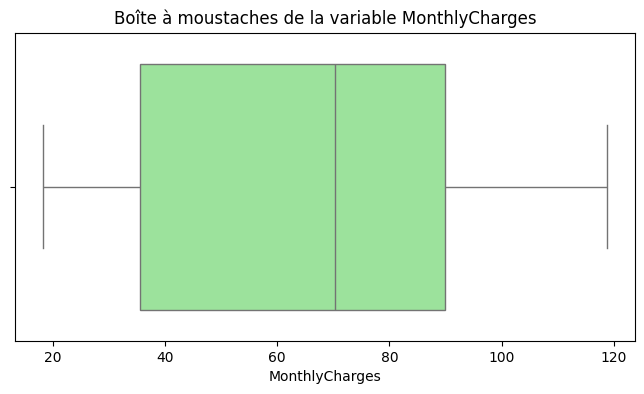

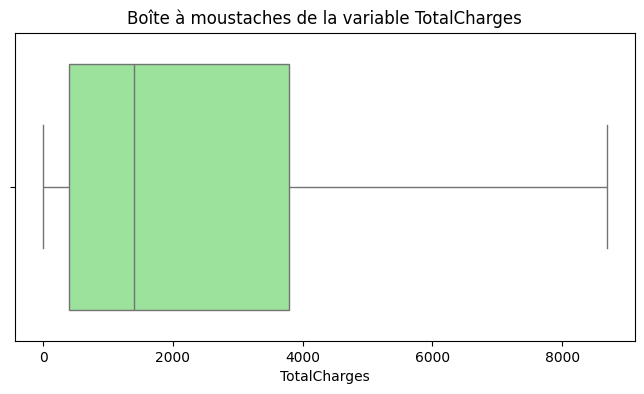

In [33]:
## visualisation des valeurs aberrantes pour les variables quantitatives
for i in data.select_dtypes(include=["float64","int64"]).columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[i],color="lightgreen")
    plt.title(f"Boîte à moustaches de la variable {i}")
    plt.show()

Super . on constate que nos donnée numerique n'ont pas de valeurs aberrantes , nous pouvons passer a la prochaine etapes qui sera l'analyse en composante multiple pour reduire la dimensionalité (nous avons 18 variables categorielles  sur 21 variables.) 

##### Analyse en composante multiple 

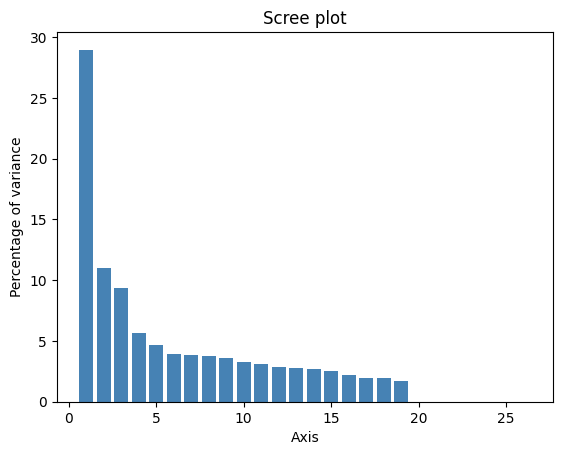

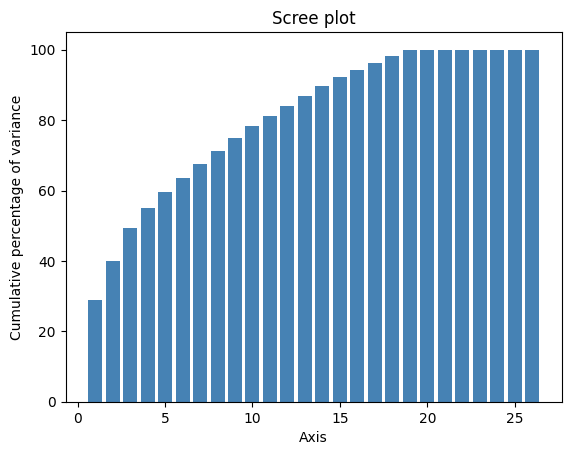

In [34]:
from fanalysis.mca import MCA
data_cat=data.select_dtypes(include=["object"]).drop(columns=["customerID","Churn"])
x=MCA()
x.fit(data_cat.values)
x.eig_
x.plot_eigenvalues(type="percentage")
x.plot_eigenvalues(type="cumulative")


en se basant sur le screeplot des valeurs propres cumullé on constate que 80% de la variance ,a priorie,est expliqué par 11 axes . Mais je dis a priori car on ne peut pas se baser sur cet graphique car elle est biaisé . Elle est biaisé du faite que le nombre de modalité est superieur au nombre de variable ce qui introduit les redondances du au indicatrice des differentes variables (la somme des indicatrice des individus est egale a 1). 
Et donc nous allons proceder a deux correction ,celle de benzecris et celle de greenacre. (benzecri garde seulement les axes pertininent superieur a l'inertie moyenne et greenacre ajuste l’inertie totale à 100 % en répartissant l’inertie corrigée ).

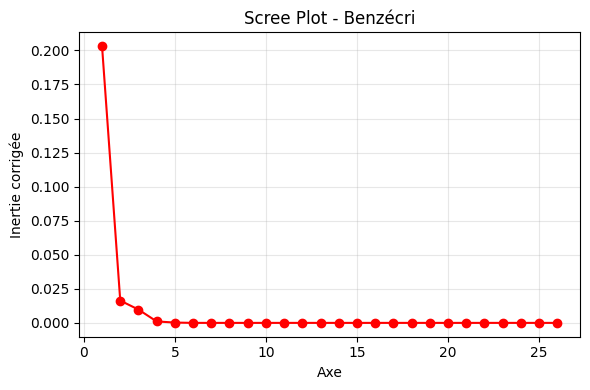

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def correction_benzecri(eig, n_variables):
    eig_corrigees = []
    seuil = 1 / n_variables
    for lambda_i in eig:
        if lambda_i > seuil:  ## pour identifier les valeurs superieur a la moyenne 
            lambda_corr = (n_variables / (n_variables - 1)) * (lambda_i - seuil) ** 2
            eig_corrigees.append(lambda_corr)
        else:
            eig_corrigees.append(0)
    return np.array(eig_corrigees)

# application de la correction 
eig_benzecri = correction_benzecri(x.eig_[0], data_cat.shape[1])

# Screeplot Benzécri
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(eig_benzecri)+1), eig_benzecri, 'o-', color='red')
plt.title("Scree Plot - Benzécri")
plt.xlabel("Axe")
plt.ylabel("Inertie corrigée")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

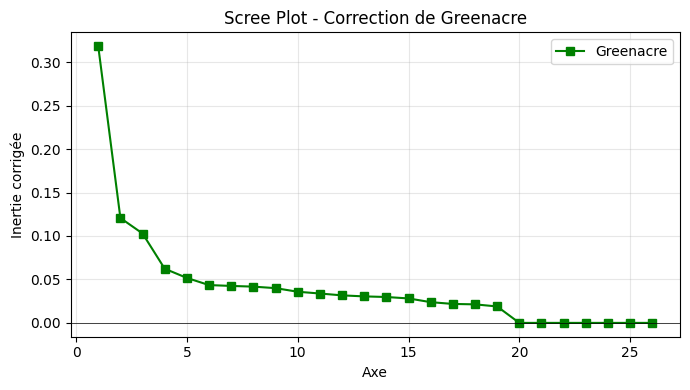

In [36]:
def correction_greenacre(eig, n_variables, n_modalites):
    eig = np.array(eig).flatten()
    facteur = (n_modalites - n_variables) / n_modalites
    eig_corrigees = []
    
    for lambda_i in eig:
        if lambda_i > 0:
            lambda_corr = lambda_i * facteur
            eig_corrigees.append(lambda_corr)
        else:
            eig_corrigees.append(0)
    
    return np.array(eig_corrigees)


n_variables = data_cat.shape[1]         
n_modalites = sum(data_cat.nunique())     
eig_greenacre = correction_greenacre(x.eig_[0], n_variables, n_modalites)

# Scree plot creenacre
plt.figure(figsize=(7, 4))
plt.plot(range(1, len(eig_greenacre)+1), eig_greenacre, 's-', color='green', label='Greenacre')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.title("Scree Plot - Correction de Greenacre")
plt.xlabel("Axe")
plt.ylabel("Inertie corrigée")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
inertie_cumulee = np.cumsum(eig_greenacre)
pourcentage_cumule = (inertie_cumulee / inertie_cumulee[-1]) * 100

tableau = pd.DataFrame({
    'Axe': [f'Dim {i+1}' for i in range(len(eig_greenacre))],
    'Inertie corrigée': np.round(eig_greenacre, 4),
    'Inertie cumulée': np.round(inertie_cumulee, 4),
    '% Inertie cumulée': np.round(pourcentage_cumule, 2)
})

print("Inertie cumulé apres Greenacre")
print(tableau.head(10))  

Inertie cumulé apres Greenacre
      Axe  Inertie corrigée  Inertie cumulée  % Inertie cumulée
0   Dim 1            0.3184           0.3184              28.96
1   Dim 2            0.1207           0.4390              39.94
2   Dim 3            0.1028           0.5419              49.30
3   Dim 4            0.0623           0.6042              54.97
4   Dim 5            0.0517           0.6559              59.67
5   Dim 6            0.0435           0.6994              63.63
6   Dim 7            0.0425           0.7419              67.50
7   Dim 8            0.0417           0.7836              71.29
8   Dim 9            0.0400           0.8236              74.93
9  Dim 10            0.0358           0.8594              78.19


En conclusion nous garderont 8 axes (ces 8 axes explique 70% de la variance ) . 

In [38]:
# 1. Variables numériques à garder et sur lesquelles nous appliquerons la standardisation
from sklearn.preprocessing import StandardScaler

# CHANGÉ : on garde le DataFrame, pas juste les noms de colonnes
num_cols_df = data.select_dtypes(include=["number"]).copy()

scaler = StandardScaler()
num_cols_df[:] = scaler.fit_transform(num_cols_df)

# 2. 8 axes MCA
coords = x.row_coord_[:, :8]
coords_df = pd.DataFrame(coords, columns=[f'MCA_{i+1}' for i in range(8)], index=data.index)

# 3. Cible
y = data['Churn']

# 4. Dataset réduit  (CHANGÉ : on utilise num_cols_df au lieu de num_cols)
data_reduit = pd.concat([num_cols_df, coords_df], axis=1)
data_reduit['Churn'] = y

print(f"Dataset réduit : {data_reduit.shape}")

Dataset réduit : (7043, 13)


C:\Users\HP\AppData\Local\Temp\ipykernel_34368\456770553.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.43991649 -0.43991649 -0.43991649 ... -0.43991649  2.27315869
 -0.43991649]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  num_cols_df[:] = scaler.fit_transform(num_cols_df)
C:\Users\HP\AppData\Local\Temp\ipykernel_34368\456770553.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.27744458  0.06632742 -1.23672422 ... -0.87024095 -1.15528349
  1.36937906]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  num_cols_df[:] = scaler.fit_transform(num_cols_df)


In [39]:
display(data_reduit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   float64
 1   tenure          7043 non-null   float64
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
 4   MCA_1           7043 non-null   float64
 5   MCA_2           7043 non-null   float64
 6   MCA_3           7043 non-null   float64
 7   MCA_4           7043 non-null   float64
 8   MCA_5           7043 non-null   float64
 9   MCA_6           7043 non-null   float64
 10  MCA_7           7043 non-null   float64
 11  MCA_8           7043 non-null   float64
 12  Churn           7043 non-null   object 
dtypes: float64(12), object(1)
memory usage: 715.4+ KB


None

In [40]:
y.unique()

array(['No', 'Yes'], dtype=object)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


## Encodage de notre variable cible 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_reduit['Churn'] = le.fit_transform(data_reduit['Churn'])

In [42]:
display(data_reduit.head())
display(data_reduit.info())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,MCA_1,MCA_2,MCA_3,MCA_4,MCA_5,MCA_6,MCA_7,MCA_8,Churn
0,-0.439916,-1.277445,-1.160323,-0.992611,-0.574787,0.228946,-0.966507,-0.469840,-0.437808,-0.280183,0.087346,-0.234309,0
1,-0.439916,0.066327,-0.259629,-0.172165,-0.193330,0.131002,-0.403885,0.553947,0.501957,0.558217,0.137420,0.109754,0
2,-0.439916,-1.236724,-0.362660,-0.958066,-0.297727,0.364258,-0.327594,0.504913,0.324360,0.070137,-0.110464,0.188838,1
3,-0.439916,0.514251,-0.746535,-0.193672,-0.411952,-0.391762,-1.210812,-0.127942,0.369006,0.190828,0.342405,0.392699,0
4,-0.439916,-1.236724,0.197365,-0.938874,-0.422695,0.814184,0.099132,0.068212,-0.019187,-0.177500,0.067922,-0.202403,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   float64
 1   tenure          7043 non-null   float64
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
 4   MCA_1           7043 non-null   float64
 5   MCA_2           7043 non-null   float64
 6   MCA_3           7043 non-null   float64
 7   MCA_4           7043 non-null   float64
 8   MCA_5           7043 non-null   float64
 9   MCA_6           7043 non-null   float64
 10  MCA_7           7043 non-null   float64
 11  MCA_8           7043 non-null   float64
 12  Churn           7043 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 715.4 KB


None

#### Constrction des modeles 

In [43]:
## division du jeu de données en trois ensembles : entraînement, validation et test
from sklearn.model_selection import train_test_split
X = data_reduit.drop(columns=['Churn'])
y = data_reduit['Churn']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("division des données effectuée avec succès")

division des données effectuée avec succès


In [44]:
display(X.columns)
display(y.unique())

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'MCA_1',
       'MCA_2', 'MCA_3', 'MCA_4', 'MCA_5', 'MCA_6', 'MCA_7', 'MCA_8'],
      dtype='object')

array([0, 1])

In [45]:
## Construction des modeles
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import xgboost as xgb
import lightgbm as lgb



In [46]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

def objective(trial):
    # Hyperparamètres à optimiser
    n_estimators = trial.suggest_int('n_estimators', 800, 3000)
    max_depth = trial.suggest_int('max_depth', 8, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 5, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    
    # 5-fold CV sur le TRAIN uniquement
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    
    return score

# Lancement de l'optimisation (30 essais = excellent compromis)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, timeout=1800)  # 30 min max

print(f"Meilleur AUC CV : {study.best_value:.4f}")
print("Meilleurs paramètres :")
print(study.best_params)

best_params = study.best_params
best_model = RandomForestClassifier(**best_params, class_weight='balanced', random_state=42)

# Entraîner sur tout le train set
best_model.fit(X_train, y_train)

# Évaluer sur le test set
y_pred_proba = best_model.predict_proba(X_val)[:, 1]
test_auc = roc_auc_score(y_val, y_pred_proba)
print(f"Score :{test_auc}")

[I 2025-12-09 21:51:56,543] A new study created in memory with name: no-name-7c304f26-474a-441a-878e-bc133732f8e6
[I 2025-12-09 21:52:13,334] Trial 0 finished with value: 0.8387497145406361 and parameters: {'n_estimators': 2766, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 0.8387497145406361.
[I 2025-12-09 21:52:42,759] Trial 1 finished with value: 0.8363853143770614 and parameters: {'n_estimators': 2540, 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8387497145406361.
[I 2025-12-09 21:53:00,490] Trial 2 finished with value: 0.8374347426617028 and parameters: {'n_estimators': 1723, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8387497145406361.
[I 2025-12-09 21:53:16,211] Trial 3 finished with value: 0.8372270875709665 and parameters: {'n_estimators': 1795, 'max_depth': 

Meilleur AUC CV : 0.8391
Meilleurs paramètres :
{'n_estimators': 1025, 'max_depth': 8, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_features': 'log2'}
Score :0.8590302565145826


In [47]:
## model lightgbm


import lightgbm as lgb
from sklearn.model_selection import cross_val_score

def objective_lgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'max_depth': trial.suggest_int('max_depth', 6, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 31, 255),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0)
    }
    
    model = lgb.LGBMClassifier(
        **params,
        random_state=42,
        n_jobs=-1,
        verbosity=-1
    )
    
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return score

# Optimisation LightGBM
study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=30, timeout=1800)

print("\n=== LIGHTGBM ===")
print(f"Meilleur AUC CV: {study_lgb.best_value:.4f}")
print("Meilleurs paramètres:", study_lgb.best_params)

# Entraînement du meilleur modèle
best_lgb = lgb.LGBMClassifier(**study_lgb.best_params, random_state=42, n_jobs=-1)
best_lgb.fit(X_train, y_train)
y_pred_lgb = best_lgb.predict_proba(X_val)[:, 1]
test_auc_lgb = roc_auc_score(y_val, y_pred_lgb)
print(f"AUC Test: {test_auc_lgb:.4f}")

[I 2025-12-09 22:03:34,803] A new study created in memory with name: no-name-3aaf9583-bb2a-47c4-b04d-124b0c0e94be
[I 2025-12-09 22:03:51,560] Trial 0 finished with value: 0.8211893166501143 and parameters: {'n_estimators': 1236, 'max_depth': 15, 'learning_rate': 0.010437223538312695, 'num_leaves': 243, 'min_child_samples': 84, 'subsample': 0.6905073890986789, 'colsample_bytree': 0.7330809235514204, 'reg_alpha': 0.22505618150445228, 'reg_lambda': 0.9738446288758069}. Best is trial 0 with value: 0.8211893166501143.
[I 2025-12-09 22:04:18,902] Trial 1 finished with value: 0.8121587100954363 and parameters: {'n_estimators': 993, 'max_depth': 10, 'learning_rate': 0.015446728473822146, 'num_leaves': 180, 'min_child_samples': 16, 'subsample': 0.6202990499740512, 'colsample_bytree': 0.8495112156144202, 'reg_alpha': 0.36361603937085174, 'reg_lambda': 0.3768648480624748}. Best is trial 0 with value: 0.8211893166501143.
[I 2025-12-09 22:04:28,479] Trial 2 finished with value: 0.800504001741966 an


=== LIGHTGBM ===
Meilleur AUC CV: 0.8301
Meilleurs paramètres: {'n_estimators': 511, 'max_depth': 14, 'learning_rate': 0.015317429943183018, 'num_leaves': 235, 'min_child_samples': 93, 'subsample': 0.9115876172115283, 'colsample_bytree': 0.7721999435595572, 'reg_alpha': 0.4548593281208735, 'reg_lambda': 0.882631750806496}
[LightGBM] [Info] Number of positive: 1295, number of negative: 3635
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2625
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262677 -> initscore=-1.032098
[LightGBM] [Info] Start training from score -1.032098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [48]:
## modele xgboost 

import xgboost as xgb
from sklearn.model_selection import cross_val_score

def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'max_depth': trial.suggest_int('max_depth', 6, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0)
    }
    
    model = xgb.XGBClassifier(
        **params,
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return score

# Optimisation XGBoost
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30, timeout=1800)

print("\n=== XGBOOST ===")
print(f"Meilleur AUC CV: {study_xgb.best_value:.4f}")
print("Meilleurs paramètres:", study_xgb.best_params)

# Entraînement du meilleur modèle
best_xgb = xgb.XGBClassifier(**study_xgb.best_params, random_state=42, n_jobs=-1, use_label_encoder=False)
best_xgb.fit(X_train, y_train)
y_pred_xgb = best_xgb.predict_proba(X_val)[:, 1]
test_auc_xgb = roc_auc_score(y_val, y_pred_xgb)
print(f"AUC Test: {test_auc_xgb:.4f}")

[I 2025-12-09 22:10:10,613] A new study created in memory with name: no-name-6921e6ba-7d81-442c-9fd8-04c0e6d4494c
[I 2025-12-09 22:10:14,104] Trial 0 finished with value: 0.7922604664007691 and parameters: {'n_estimators': 1431, 'max_depth': 14, 'learning_rate': 0.09184938174945483, 'min_child_weight': 9, 'subsample': 0.6097281999144564, 'colsample_bytree': 0.7099841868607226, 'gamma': 0.45127367132235197, 'reg_alpha': 0.731993796932685, 'reg_lambda': 0.30685160687691126}. Best is trial 0 with value: 0.7922604664007691.
[I 2025-12-09 22:10:17,517] Trial 1 finished with value: 0.7967125703026666 and parameters: {'n_estimators': 1821, 'max_depth': 7, 'learning_rate': 0.10572412952691503, 'min_child_weight': 4, 'subsample': 0.6806809222465977, 'colsample_bytree': 0.9372590834497204, 'gamma': 0.8014857997427765, 'reg_alpha': 0.10816651726346938, 'reg_lambda': 0.25556215901118107}. Best is trial 1 with value: 0.7967125703026666.
[I 2025-12-09 22:10:19,513] Trial 2 finished with value: 0.799


=== XGBOOST ===
Meilleur AUC CV: 0.8297
Meilleurs paramètres: {'n_estimators': 1352, 'max_depth': 9, 'learning_rate': 0.015191228005201538, 'min_child_weight': 9, 'subsample': 0.9606397513987701, 'colsample_bytree': 0.6981418034189458, 'gamma': 0.7509782443961708, 'reg_alpha': 0.2625848731895101, 'reg_lambda': 0.032542737595466234}
AUC Test: 0.8528


In [60]:
## modele extratrees

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

def objective_et(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 800, 3000),
        'max_depth': trial.suggest_int('max_depth', 8, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }
    
    model = ExtraTreesClassifier(
        **params,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return score

# Optimisation Extra Trees
study_et = optuna.create_study(direction='maximize')
study_et.optimize(objective_et, n_trials=30, timeout=1800)

print("\n=== EXTRA TREES ===")
print(f"Meilleur AUC CV: {study_et.best_value:.4f}")
print("Meilleurs paramètres:", study_et.best_params)

# Entraînement du meilleur modèle
best_et = ExtraTreesClassifier(**study_et.best_params, class_weight='balanced', random_state=42, n_jobs=-1)
best_et.fit(X_train, y_train)
y_pred_et = best_et.predict_proba(X_val)[:, 1]
test_auc_et = roc_auc_score(y_val, y_pred_et)
print(f"AUC Test: {test_auc_et:.4f}")

[I 2025-12-09 22:25:34,474] A new study created in memory with name: no-name-222cb19e-1c44-4bc7-a1a4-8d0c95fe0a68


[I 2025-12-09 22:25:41,228] Trial 0 finished with value: 0.8393402834943414 and parameters: {'n_estimators': 2598, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.8393402834943414.
[I 2025-12-09 22:25:43,729] Trial 1 finished with value: 0.8335450600925153 and parameters: {'n_estimators': 914, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.8393402834943414.
[I 2025-12-09 22:25:48,132] Trial 2 finished with value: 0.8375898201207692 and parameters: {'n_estimators': 1802, 'max_depth': 8, 'min_samples_split': 11, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.8393402834943414.
[I 2025-12-09 22:25:52,396] Trial 3 finished with value: 0.8318455810890473 and parameters: {'n_estimators': 1158, 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_fe


=== EXTRA TREES ===
Meilleur AUC CV: 0.8401
Meilleurs paramètres: {'n_estimators': 2984, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': False}
AUC Test: 0.8644


In [61]:
y_pred_et = best_et.predict_proba(X_test)[:, 1]
test_auc_et = roc_auc_score(y_test, y_pred_et)
print(f"AUC Test: {test_auc_et:.4f}")

AUC Test: 0.8564


### Feature Engineering 

In [50]:
data_reduit2 = data_reduit.copy()

data_reduit2['Contract_Tenure'] = (
    data['Contract'].astype(str) + "_ten" + 
    pd.cut(data['tenure'], 
           bins=[-1, 6, 12, 24, 48, 1000],          # -1 pour inclure tenure=0
           labels=['0-6', '7-12', '13-24', '25-48', '48+']
          ).astype(str)
)

# Si jamais il y a des NaN dans le cut (rare mais possible), on remplace par 'unknown'
data_reduit2['Contract_Tenure'] = data_reduit2['Contract_Tenure'].replace('nan', 'unknown')

In [51]:
# Client à très haut risque (souvent >50% de churn)
data_reduit2['HighRiskProfile'] = (
    (data['Contract']=='Month-to-month') &
    (data['tenure'] <= 12) &
    (data['InternetService']=='Fiber optic') &
    (data['PaperlessBilling']=='Yes')
).astype(int)

# Client quasi fidèle
data_reduit2['LoyalProfile'] = (
    (data['Contract']=='Two year') |
    (data['tenure'] > 60)
).astype(int)

In [52]:
print(data_reduit2.head())
print(data_reduit2.info())

   SeniorCitizen    tenure  MonthlyCharges  TotalCharges     MCA_1     MCA_2  \
0      -0.439916 -1.277445       -1.160323     -0.992611 -0.574787  0.228946   
1      -0.439916  0.066327       -0.259629     -0.172165 -0.193330  0.131002   
2      -0.439916 -1.236724       -0.362660     -0.958066 -0.297727  0.364258   
3      -0.439916  0.514251       -0.746535     -0.193672 -0.411952 -0.391762   
4      -0.439916 -1.236724        0.197365     -0.938874 -0.422695  0.814184   

      MCA_3     MCA_4     MCA_5     MCA_6     MCA_7     MCA_8  Churn  \
0 -0.966507 -0.469840 -0.437808 -0.280183  0.087346 -0.234309      0   
1 -0.403885  0.553947  0.501957  0.558217  0.137420  0.109754      0   
2 -0.327594  0.504913  0.324360  0.070137 -0.110464  0.188838      1   
3 -1.210812 -0.127942  0.369006  0.190828  0.342405  0.392699      0   
4  0.099132  0.068212 -0.019187 -0.177500  0.067922 -0.202403      1   

         Contract_Tenure  HighRiskProfile  LoyalProfile  
0  Month-to-month_ten0-6    

In [53]:
data_reduit2["Contract_Tenure"].unique()

array(['Month-to-month_ten0-6', 'One year_ten25-48',
       'Month-to-month_ten7-12', 'Month-to-month_ten13-24',
       'Month-to-month_ten25-48', 'One year_ten48+', 'Two year_ten13-24',
       'Month-to-month_ten48+', 'Two year_ten48+', 'One year_ten7-12',
       'One year_ten13-24', 'Two year_ten25-48', 'One year_ten0-6',
       'Two year_ten7-12', 'Two year_ten0-6'], dtype=object)

In [54]:
from sklearn.preprocessing import OneHotEncoder

# On crée l'encodeur
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' pour éviter une colonne redondante

# On applique sur Contract_Tenure (il faut [[ ]] → 2D array)
encoded = encoder.fit_transform(data_reduit2[['Contract_Tenure']])

# On récupère les noms des nouvelles colonnes
col_names = encoder.get_feature_names_out(['Contract_Tenure'])

# On crée un DataFrame avec les colonnes encodées
encoded_df = pd.DataFrame(encoded, columns=col_names, index=data_reduit2.index)

# On supprime l’ancienne colonne et on ajoute les nouvelles
data_reduit2 = pd.concat([data_reduit2.drop('Contract_Tenure', axis=1), encoded_df], axis=1)

print(data_reduit2.filter(like='Contract_Tenure').columns)

Index(['Contract_Tenure_Month-to-month_ten13-24',
       'Contract_Tenure_Month-to-month_ten25-48',
       'Contract_Tenure_Month-to-month_ten48+',
       'Contract_Tenure_Month-to-month_ten7-12',
       'Contract_Tenure_One year_ten0-6', 'Contract_Tenure_One year_ten13-24',
       'Contract_Tenure_One year_ten25-48', 'Contract_Tenure_One year_ten48+',
       'Contract_Tenure_One year_ten7-12', 'Contract_Tenure_Two year_ten0-6',
       'Contract_Tenure_Two year_ten13-24',
       'Contract_Tenure_Two year_ten25-48', 'Contract_Tenure_Two year_ten48+',
       'Contract_Tenure_Two year_ten7-12'],
      dtype='object')


In [55]:
from sklearn.model_selection import train_test_split

target = 'Churn' 

X = data_reduit2.drop(columns=[target])
y = data_reduit2[target]

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_val2, X_test2, y_val2, y_test2 = train_test_split(
    X_temp2, y_temp2, test_size=0.50, stratify=y_temp2, random_state=42
)

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

def objective_et(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 800, 3000),
        'max_depth': trial.suggest_int('max_depth', 8, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }
    
    model = ExtraTreesClassifier(
        **params,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    
    score = cross_val_score(model, X_train2, y_train2, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return score

# Optimisation Extra Trees
study_et = optuna.create_study(direction='maximize')
study_et.optimize(objective_et, n_trials=30, timeout=1800)

print("\n=== EXTRA TREES ===")
print(f"Meilleur AUC CV: {study_et.best_value:.4f}")
print("Meilleurs paramètres:", study_et.best_params)

# Entraînement du meilleur modèle
best_et = ExtraTreesClassifier(**study_et.best_params, class_weight='balanced', random_state=42, n_jobs=-1)
best_et.fit(X_train2, y_train2)
y_pred_et = best_et.predict_proba(X_val2)[:, 1]
test_auc_et = roc_auc_score(y_val2, y_pred_et)
print(f"AUC Test: {test_auc_et:.4f}")

[I 2025-12-09 22:15:25,356] A new study created in memory with name: no-name-11127268-928c-4494-999e-4b3c5a6115ae
[I 2025-12-09 22:15:34,879] Trial 0 finished with value: 0.8316785175056763 and parameters: {'n_estimators': 932, 'max_depth': 16, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.8316785175056763.
[I 2025-12-09 22:15:44,828] Trial 1 finished with value: 0.8397700371517443 and parameters: {'n_estimators': 1815, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.8397700371517443.
[I 2025-12-09 22:15:50,209] Trial 2 finished with value: 0.8425666649220714 and parameters: {'n_estimators': 1327, 'max_depth': 20, 'min_samples_split': 14, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 2 with value: 0.8425666649220714.
[I 2025-12-09 22:16:02,565] Trial 3 finished with value: 0.8426170369986


=== EXTRA TREES ===
Meilleur AUC CV: 0.8443
Meilleurs paramètres: {'n_estimators': 1821, 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': None, 'bootstrap': True}
AUC Test: 0.8431


In [59]:
y_pred_et = best_et.predict_proba(X_test2)[:, 1]
test_auc_et = roc_auc_score(y_test2, y_pred_et)
print(f"AUC Test: {test_auc_et:.4f}")

AUC Test: 0.8403


### Conclusion 

En definitive le modele retenue sera le modele extra trees avec un accuracy de 0.8564 sur l'echantillonns test avant feature engineering . 